# Data Visualization with Seaborn

Just like a picture tells a 1000 words, a graph can summarize 1000s of data points and can tell a story that a spreadsheet or summary statistic can't hold a torch to. In this notebook we'll be working through how to make jaw-dropping graphs in seaborn. This tutorial's been adapted from Bruno Gonçalves (www.data4sci.com) and the official seaborn tutorial (https://seaborn.pydata.org/tutorial.html).

Imports 
For today's class we'll be using the package Seaborn (common convention is to imported it as sns. Seaborn is a wrapper (meaning that it groups functionality from another package in an easier format) for matplotlib, a very common graphing library that can be a little clunky to write. For the majority of your needs, seaborn is quicker and prettier - but we'll import matplotlib for some specific functionality.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#This is so that you don't see a bunch of code 'warnings' (things that you could change but don't have to right now)
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

#This makes all of our graphs show up in our notebook when they're made
%matplotlib inline

# <font color='#eb3483'> Seaborn Datasets </font>

To start, we're going to need something to actually plot! Seaborn makes a small list of datasets easily available:

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

# Exploring the *Titanic* dataset with `seaborn`

First we load in the data and take a look

In [4]:
titanic = sns.load_dataset("titanic")
titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

The first time you load a dataset you'll need an internet connection so that the data can be downloaded from github. The **load_dataset** function returns a pandas data frame

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
for col in titanic.columns:
    print(col)

survived
pclass
sex
age
sibsp
parch
fare
embarked
class
who
adult_male
deck
embark_town
alive
alone


Finally set up a palette dictionary for some of the plots.

In [7]:
pal = dict(man="#4682B4", woman="#CD5C5C", child="#2E8B57", male="#6495ED", female="#F08080")

## Who were the *Titanic* passengers?

# Before getting to the main question (who survived), let's take a look at the dataset to get a sense for how the observations are distributed into the different levels of our factors of interest.

### How many men, women, and children are in our sample?

First let's count the number of males and females, ignoring age.

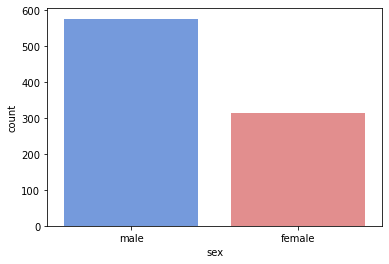

In [8]:
ax = sns.countplot(x='sex', data=titanic, palette=pal)

Then we can look at how this is distributed into the three classes.

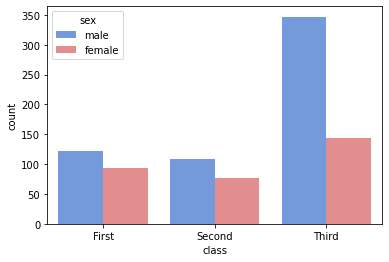

In [11]:
ax = sns.countplot(x='class', data=titanic, hue="sex", palette=pal)

We also have a separate classification that splits off children (recall, this is going to be relevant because of the "women and children first" policy followed during the evacuation).

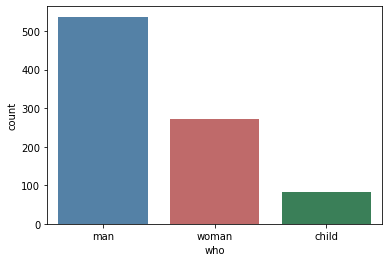

In [14]:
sns.countplot("who", data=titanic, palette=pal);

Next let's look at the distribution of ages within the groups we defined above.

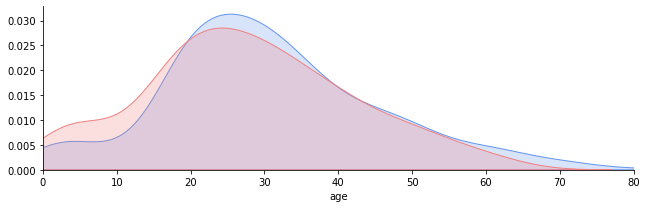

In [23]:
fg = sns.FacetGrid(titanic, hue="sex", aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

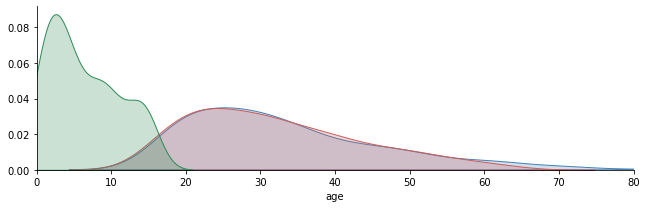

In [24]:
fg = sns.FacetGrid(titanic, hue="who",aspect=3, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));

### How many first, second, and third class passengers are in our sample?

Although have some information about the distribution into classes from the sex plots, let's directly visualize it an then see how the classes break down by age.

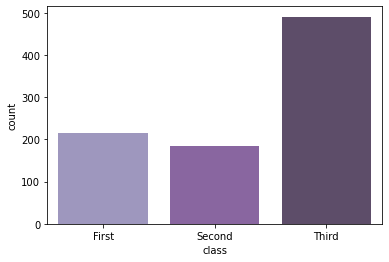

In [25]:
sns.countplot("class", data=titanic, palette="BuPu_d");

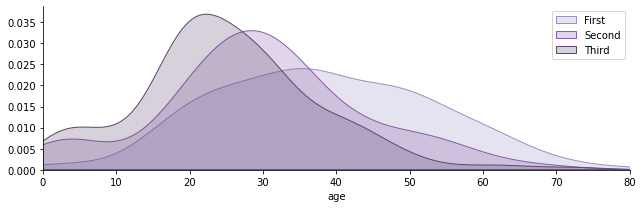

In [30]:
fg = sns.FacetGrid(titanic, hue="class", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));
plt.legend()

Finally let's look at the breakdown by age and sex.

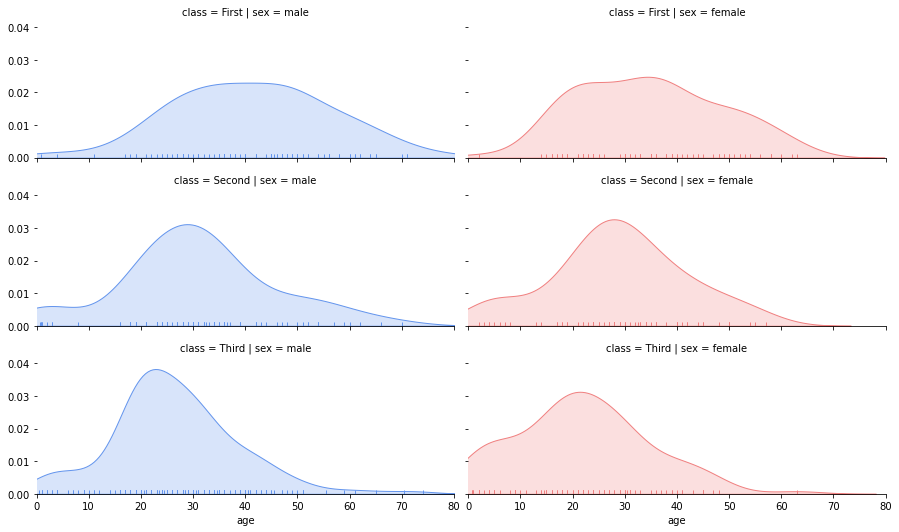

In [33]:
fg = sns.FacetGrid(titanic, col="sex", row="class", hue="sex", size=2.5, aspect=2.5, palette=pal)
fg.map(sns.kdeplot, "age", shade=True)
fg.map(sns.rugplot, "age")
sns.despine(left=True)
fg.set(xlim=(0, 80));

### Where were our passenger's cabins?

We also have information about what deck each passgener's cabin was on, which may be relevant.

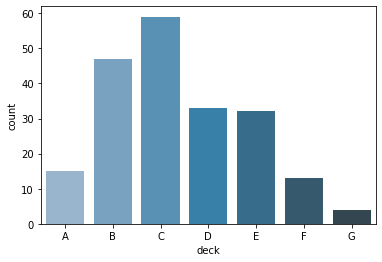

In [34]:
sns.countplot("deck", data=titanic, palette="PuBu_d");

How did the decks break down by class for the passengers we have data about?

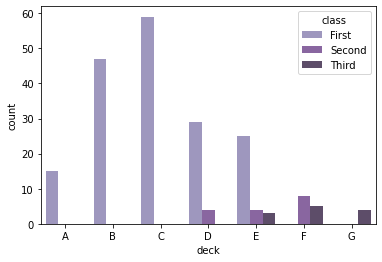

In [35]:
sns.countplot("deck", hue="class", data=titanic, palette="BuPu_d");

Note that we're missing a lot of deck data for the second and third class passengers, which will be important to keep in mind later.

## Excercise: What made people survive the sinking?

<div style="width:100%; text-align:center">
<i>Iceberg, dead ahead!</i><br><br>
<img src=http://upload.wikimedia.org/wikipedia/en/b/bb/Titanic_breaks_in_half.jpg width=500px>
</div>

Now that we have a feel for the characteristics of our sample, let's get down to the main question and ask what factors seem to predict whether our passengers survived. But first, one more count plot just to see how many of our passengers perished in the sinking.

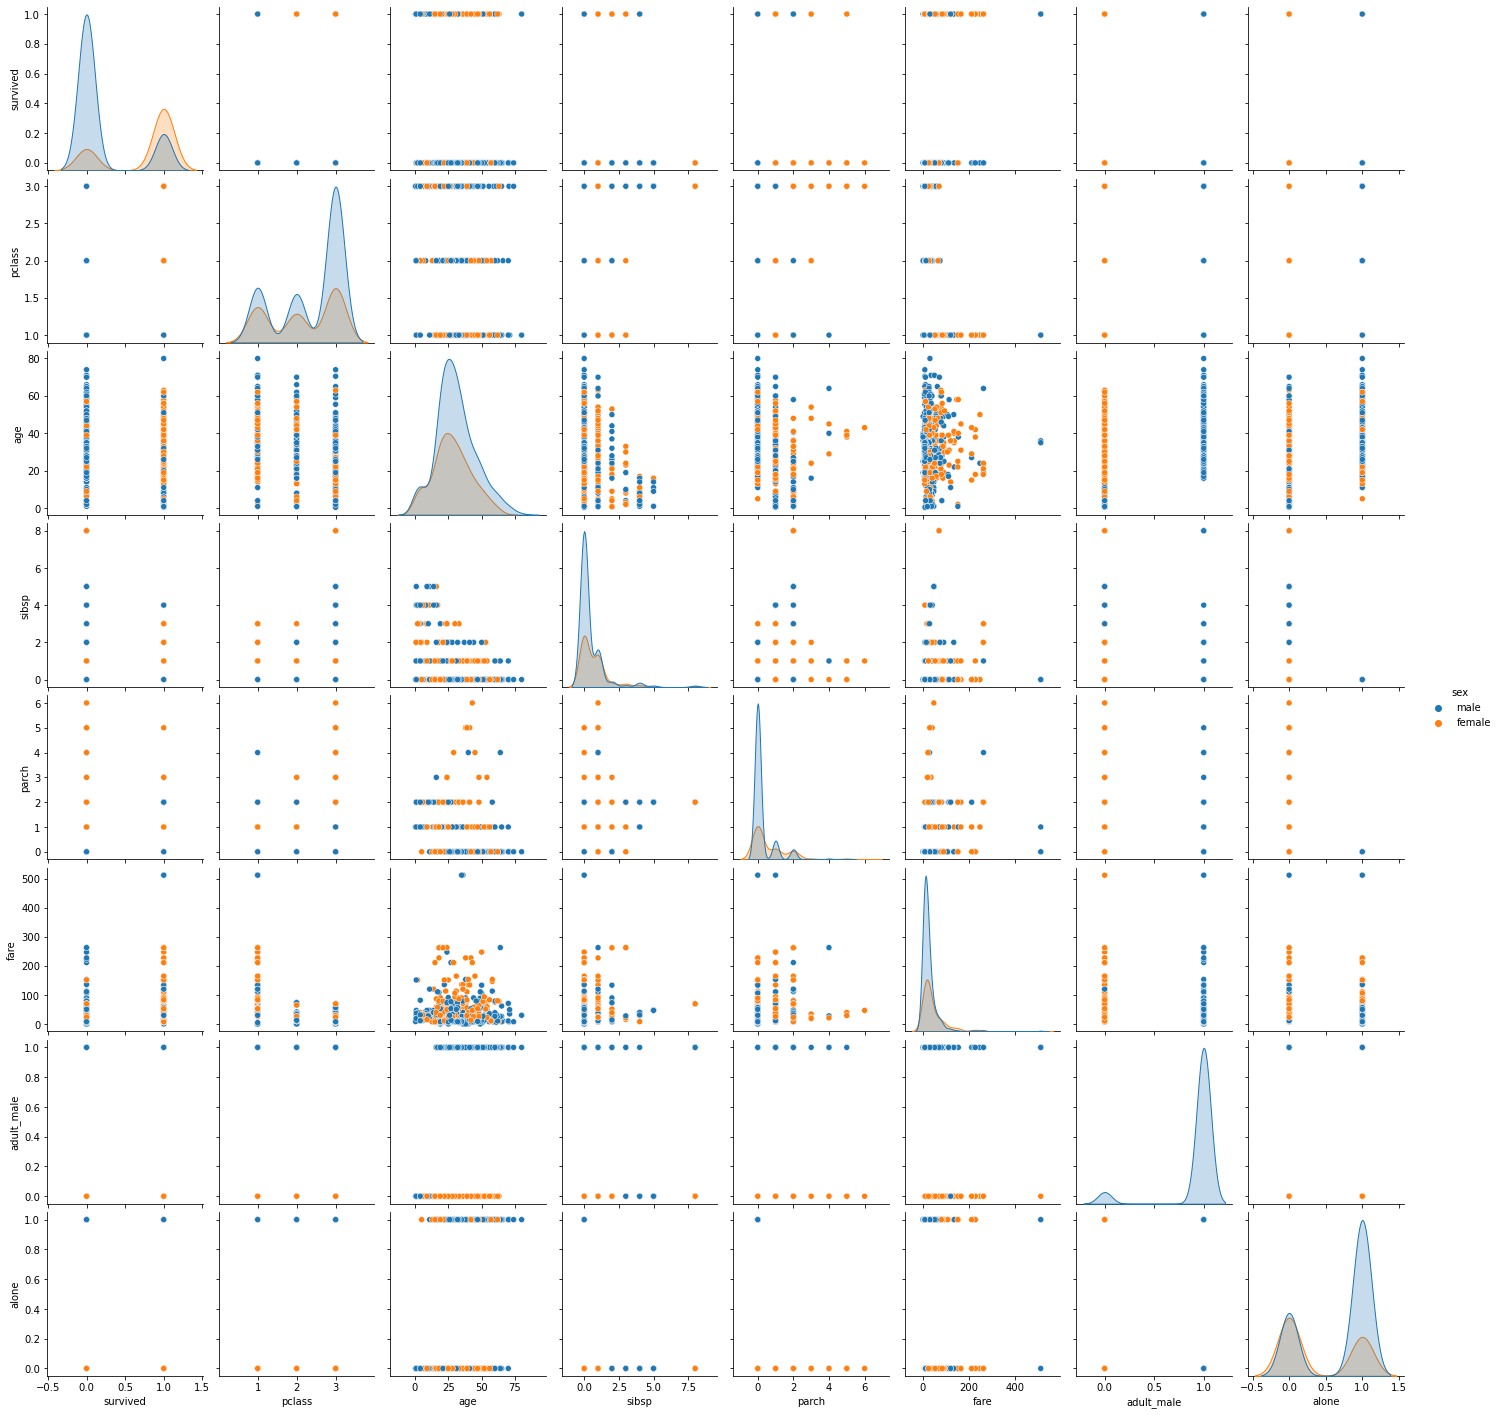

In [40]:
pp = sns.pairplot(titanic, hue="sex")

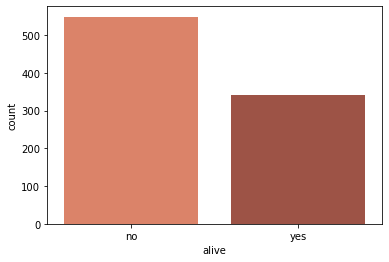

In [84]:
sns.countplot("alive", data=titanic, palette="OrRd_d");

### What classes had the survivors traveled in?

It's part of popular lore that the third-class (or steerage) passengers fared much more poorly than their wealthier shipmates. Is this borne out in the data?

We also of course know that women were given high priority during the evacuation, and we saw above that Third class was disproportionately male. Maybe that's driving the class effect?

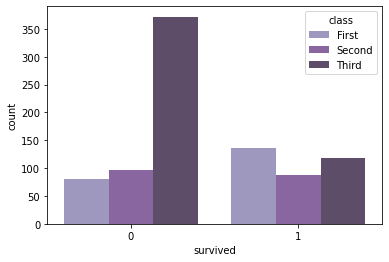

In [44]:
sns.countplot("survived", hue="class", data=titanic, palette="BuPu_d");

In [47]:
titanic[titanic['survived']==1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### What effect did "women and children first" have?

<AxesSubplot:xlabel='class', ylabel='count'>

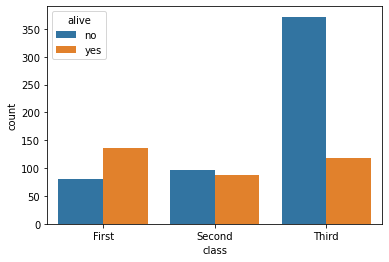

In [52]:
sns.countplot("class", hue="alive", data=titanic)


Were they at least successful in evacuating the children?

We suspect that the best way to predict survival is to look at whether a passenger was an adult male and what class he or she was in.

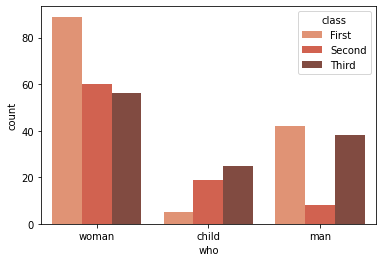

In [60]:
survived = titanic[titanic['alive'] == 'yes']
sns.countplot('who', hue='class', data=survived, palette="OrRd_d");

Another way to plot the same data emphasizes the different outcomes for men and other passengers even more dramatically.

### Did age matter in general?

We can also ask whether age as a contiunous variable mattered. We can draw logistic regression plots, first jittering the survival datapoints to get a sense of the distribution. Use sns.lmplot to do this

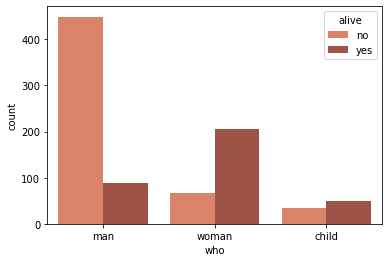

In [64]:
sns.countplot('who', hue='alive', data=titanic, palette="OrRd_d");

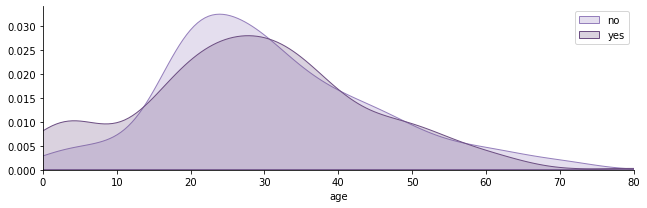

In [5]:
fg = sns.FacetGrid(titanic, hue="alive", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "age", shade=True)
fg.set(xlim=(0, 80));
plt.legend()

### How did age interact with sex and class?

We know that sex is important, though, so we probably want to separate out these predictions for men and women.

Class is imporant too, let's see whether it interacts with the age variable as well.

### Did it matter what passengers paid, or where they stayed?

We know that class matters, but we can also use the `fare` variable as a proxy for a contiuous measure of wealth.

Perhaps it mattered what deck each passenger's cabin was on?

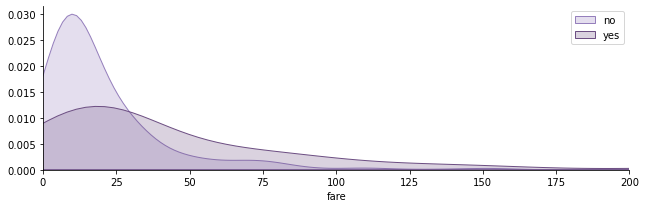

In [7]:
fg = sns.FacetGrid(titanic, hue="alive", aspect=3, palette="BuPu_d")
fg.map(sns.kdeplot, "fare", shade=True)
fg.set(xlim=(0, 200));
plt.legend()

### Did family members increase the odds of survival?

Although the way our data on family members was coded, we don't know for sure what sort of companions these passengers had, but it's worth asking how they influenced survival.

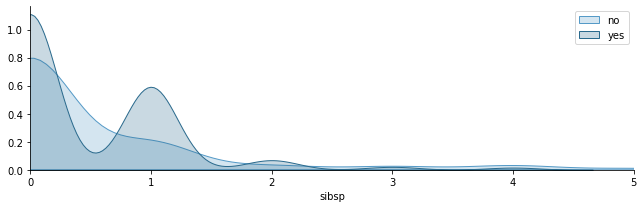

In [85]:
fg = sns.FacetGrid(titanic, hue="alive", aspect=3, palette="PuBu_d")
fg.map(sns.kdeplot, "sibsp", shade=True)
fg.set(xlim=(0, 5));
plt.legend()